In [348]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.metrics import mean_squared_error
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import ssl
from scraperGoogle import scrape

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('vader_lexicon')
plt.style.use('fivethirtyeight')

df = yf.download("TSLA", start="2022-01-01", end="2022-12-31")
df.index = pd.to_datetime(df.index)
df['Date'] = pd.to_datetime(df.index)


[*********************100%***********************]  1 of 1 completed


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/pvpswaghd/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [349]:
from finvader import finvader
def analyze_sentiment(text):
    scores = finvader(text, 
                  use_sentibignomics = True, 
                  use_henry = True, 
                  indicator = 'compound' )
    return scores

# Autoregression

In [108]:
# from statsmodels.tsa.ar_model import AutoReg
# from sklearn.metrics import mean_squared_error
# from math import sqrt

# df = df['Close']
# X = df.values
# train, test = X[1:len(X)-7], X[len(X)-7:]
# model = AutoReg(train, lags=29)
# model_fit = model.fit()
# print('Coefficients: %s' % model_fit.params)

predicted=233.921272, expected=216.619995
predicted=235.076296, expected=213.446671
predicted=236.288516, expected=215.326660
predicted=236.122902, expected=220.589996
predicted=234.064436, expected=221.229996
predicted=231.511088, expected=221.996674
predicted=234.087296, expected=231.593338
Test RMSE: 15.626


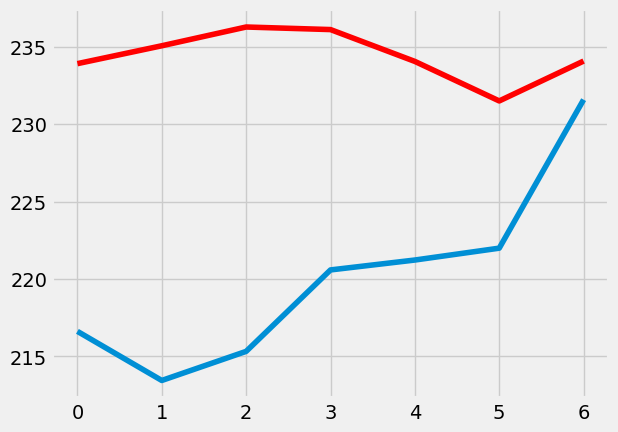

In [107]:
# make predictions
# predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
# for i in range(len(predictions)):
#  print('predicted=%f, expected=%f' % (predictions[i], test[i]))
# rmse = sqrt(mean_squared_error(test, predictions))
# print('Test RMSE: %.3f' % rmse)
# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

# TSS Without Cross Validation

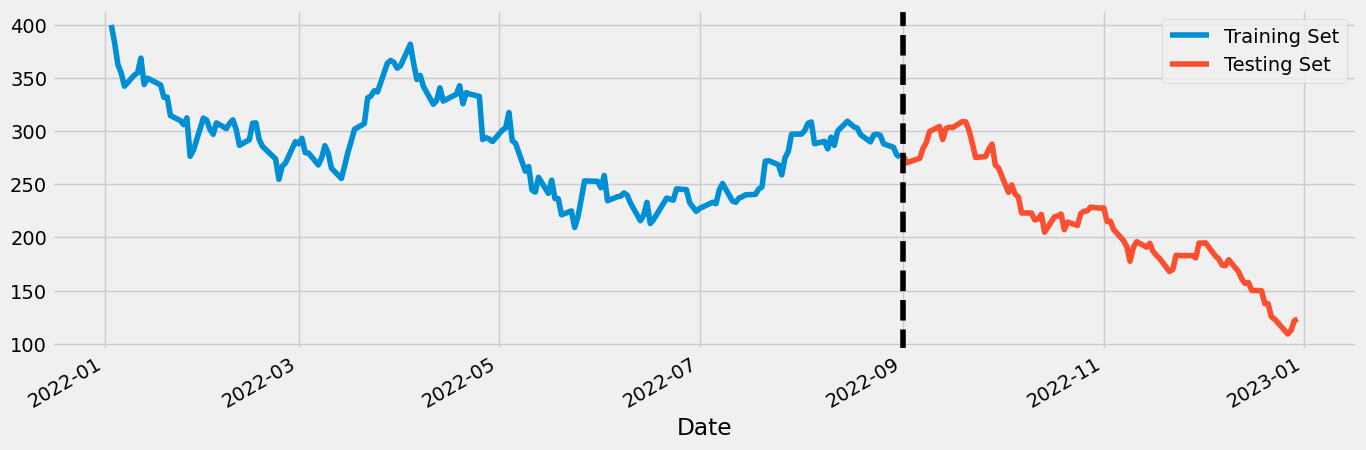

In [350]:
train_df = df.loc[df.index < '2022-09-01']
test_df = df.loc[df.index >= '2022-09-01']

fig, ax = plt.subplots(figsize=(15, 5))
train_df['Close'].plot(ax=ax, label='Training')
test_df['Close'].plot(ax=ax, label='Test')
ax.axvline(x='2022-09-01', c='black', linestyle='--')
ax.legend(['Training Set', 'Testing Set'])
plt.show()

In [351]:
pd.options.mode.chained_assignment = None  # default='warn'
train_df['sentiment'] = np.zeros(len(train_df))
train_df['sentiment_volatility'] = np.zeros(len(train_df))
train_df['Date'] = pd.to_datetime(train_df.index)
for i, row in train_df.iterrows():
    score = []
    res = scrape("tesla stock news", 10, str(row['Date']).rsplit(' ')[0], str(row['Date']).rsplit(' ')[0])
    print("+++++++++++")
    # print(str(row['Date']).rsplit(' ')[0], res)
    for topic in res:
        sentiment = analyze_sentiment(topic)
        score.append(sentiment)
    train_df.at[i, 'sentiment'] = np.mean(score)
    train_df.at[i, 'sentiment_volatility'] = np.std(score)
    print(train_df['sentiment'][i], train_df['sentiment_volatility'][i])
train_df.to_csv('./Testing Data/train_df.csv')


https://www.google.com/search?client=safari&sca_esv=555929706&rls=en&tbs=cdr:1,cd_min:01/03/2022,cd_max:01/03/2022&q=tesla+stock+news&tbm=nws&source=lnms&sa=X&ved=2ahUKEwiP77OD89SAAxVSpVYBHYCKD9kQ0pQJegQIDBAB&biw=1373&bih=603&dpr=2
+++++++++++
0.38406 0.27816866897621667
https://www.google.com/search?client=safari&sca_esv=555929706&rls=en&tbs=cdr:1,cd_min:01/04/2022,cd_max:01/04/2022&q=tesla+stock+news&tbm=nws&source=lnms&sa=X&ved=2ahUKEwiP77OD89SAAxVSpVYBHYCKD9kQ0pQJegQIDBAB&biw=1373&bih=603&dpr=2
+++++++++++
0.16948 0.23595295209003003
https://www.google.com/search?client=safari&sca_esv=555929706&rls=en&tbs=cdr:1,cd_min:01/05/2022,cd_max:01/05/2022&q=tesla+stock+news&tbm=nws&source=lnms&sa=X&ved=2ahUKEwiP77OD89SAAxVSpVYBHYCKD9kQ0pQJegQIDBAB&biw=1373&bih=603&dpr=2
+++++++++++
0.07841000000000001 0.28567103615872574
https://www.google.com/search?client=safari&sca_esv=555929706&rls=en&tbs=cdr:1,cd_min:01/06/2022,cd_max:01/06/2022&q=tesla+stock+news&tbm=nws&source=lnms&sa=X&ved=2ahUKEwiP

In [352]:
test_df['sentiment'] = np.zeros(len(test_df))
test_df['sentiment_volatility'] = np.zeros(len(test_df))
test_df['Date'] = pd.to_datetime(test_df.index)
for i, row in test_df.iterrows():
    score = []
    res = scrape("tesla stock news", 10, str(row['Date']).rsplit(' ')[0], str(row['Date']).rsplit(' ')[0])
    print("+++++++++++")
    for topic in res:
        sentiment = analyze_sentiment(topic)
        print(sentiment, topic)
        score.append(sentiment)
    test_df.at[i, 'sentiment'] = np.mean(score)
    test_df.at[i, 'sentiment_volatility'] = np.std(score)
    print(test_df['sentiment'][i], test_df['sentiment_volatility'][i])
test_df.to_csv('./Testing Data/test_df.csv')

https://www.google.com/search?client=safari&sca_esv=555929706&rls=en&tbs=cdr:1,cd_min:09/01/2022,cd_max:09/01/2022&q=tesla+stock+news&tbm=nws&source=lnms&sa=X&ved=2ahUKEwiP77OD89SAAxVSpVYBHYCKD9kQ0pQJegQIDBAB&biw=1373&bih=603&dpr=2
+++++++++++
-0.3716 Li Auto's Awful Deliveries Send Tesla Stock Lower
-0.3674 Dow Jones Drops On Economic Data; AMD, Nvidia Dive On ...
-0.0374 Dow, S&P 500 close higher to snap four-day losing streak and begin September
-0.2216 Apple, Tesla and Amazon stocks in danger of 1st closes below 50-DMAs in 
nearly 2 months
-0.3432 Tesla Stock Takes Hit From Nvidia's Warning About Business With China
-0.0077 'Big Short' Legend Michael Burry Hints Stock Market Crash Is ...
0.0013 CA could make it illegal for Tesla to call cars 'Full Self Driving'
0.0207 What happened in US stocks today? Check top gainers and ...
0.0168 How Tesla Stock Could Double by 2030
0.0 Tesla (TSLA) scouts factory sites in Quebec and Ontario
-0.13101000000000002 0.16446774425400257
https://www.

In [428]:
train_df = pd.read_csv('./Training Data/train_df.csv')
test_df = pd.read_csv('./Testing Data/test_df.csv')

train_df['sentiment_squared'] = train_df['sentiment']**2
test_df['sentiment_squared'] = test_df['sentiment']**2

df = yf.download("TSLA", start="2022-01-01", end="2022-12-31")
df.index = pd.to_datetime(df.index)
df['Date'] = pd.to_datetime(df.index)


[*********************100%***********************]  1 of 1 completed


In [429]:
def prepare_dataframe_for_lstm(df, n_steps):
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    for i in range(1, n_steps+1):
        df[f'Open_{i}'] = df['Open'] - df['Open'].shift(i)
        df[f'sentiment_{i}'] = df['sentiment'] - df['sentiment'].shift(i)
        
    df.dropna(inplace=True)
    return df

train_df['Open_change'] = train_df['Open'] - train_df['Open'].shift(1)
test_df['Open_change'] = test_df['Open'] - test_df['Open'].shift(1)
df['Open_change'] = df['Open'] - df['Open'].shift(1)
train_df = prepare_dataframe_for_lstm(train_df, 4)
test_df = prepare_dataframe_for_lstm(test_df, 4)

In [430]:
# train_df.index = pd.to_datetime(train_df['Date'])
# test_df.index = pd.to_datetime(test_df['Date'])

features = ['Open_2', 'Open_3']

target = 'Open_change'
X_train = train_df[features] 
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

reg = RandomForestRegressor(n_estimators=10000, random_state=42)
reg.fit(X_train, y_train)
# reg = ElasticNet(alpha=0.5, l1_ratio=0.5)
# reg.fit(X_train, y_train)
# y_train_pred = reg.predict(X_train)
# y_test_pred = reg.predict(X_test)
# print("Train R-squared:", r2_score(y_train, y_train_pred))
# print("Test R-squared:", r2_score(y_test, y_test_pred))

# reg = xgb.XGBRegressor(n_estimators=2000, learning_rate=0.01)
# reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=50, verbose=100)

RandomForestRegressor(n_estimators=10000, random_state=42)

<Axes: >

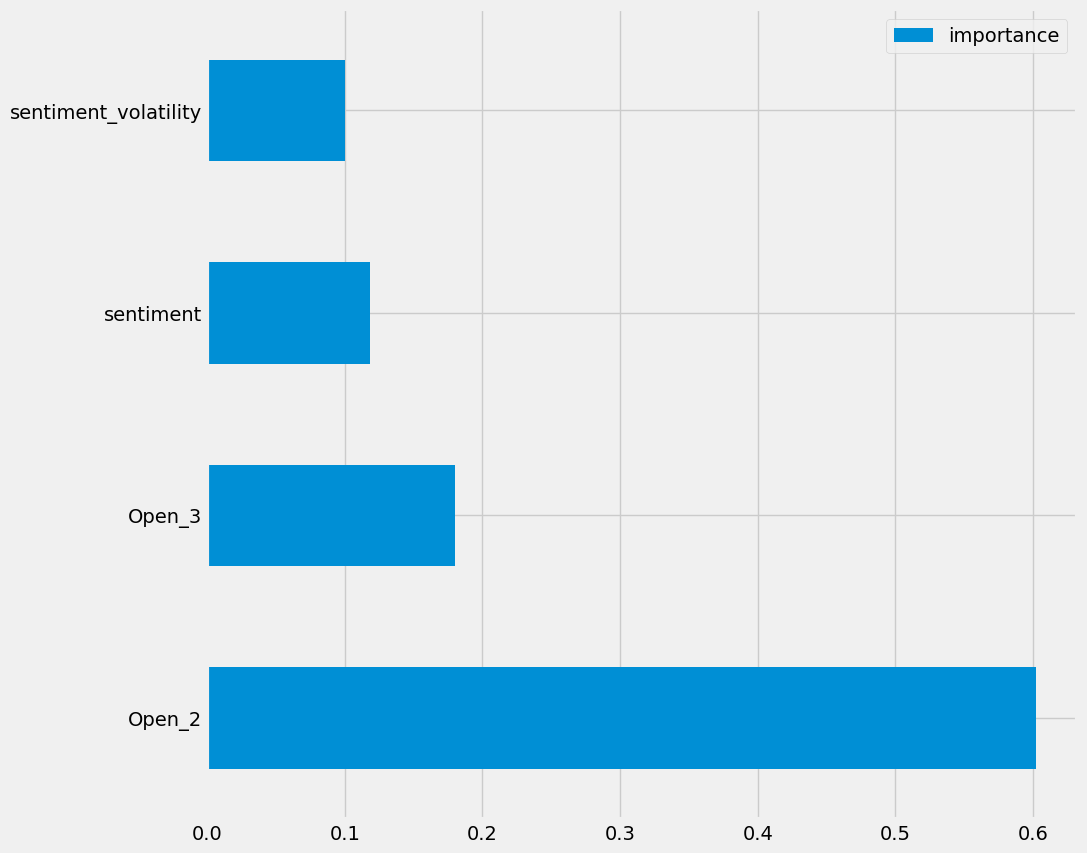

In [417]:
fi = pd.DataFrame(data=reg.feature_importances_, index=reg.feature_names_in_, columns=['importance'])
fi.plot(kind='barh', figsize=(10, 10))

In [431]:
test_df['Prediction'] = reg.predict(X_test)
df = df.merge(test_df[['Prediction']], how='left', left_index=True, right_index=True)
test_df.index

DatetimeIndex(['2022-09-08', '2022-09-09', '2022-09-12', '2022-09-13',
               '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-19',
               '2022-09-20', '2022-09-21', '2022-09-22', '2022-09-23',
               '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29',
               '2022-09-30', '2022-10-03', '2022-10-04', '2022-10-05',
               '2022-10-06', '2022-10-07', '2022-10-10', '2022-10-11',
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-17',
               '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21',
               '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
               '2022-10-28', '2022-10-31', '2022-11-01', '2022-11-02',
               '2022-11-03', '2022-11-04', '2022-11-07', '2022-11-08',
               '2022-11-09', '2022-11-10', '2022-11-11', '2022-11-14',
               '2022-11-15', '2022-11-16', '2022-11-17', '2022-11-18',
               '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-25',
      

In [419]:
from sklearn.metrics import r2_score
# test_df = test_df[['Open_change', 'Prediction']]
r_val = r2_score(test_df['Open_change'], test_df['Prediction'])

print("With sentiment", r_val)

With sentiment 0.40903874280813346


In [432]:
df.to_csv('resultant_data/pure_data.csv', index=False)

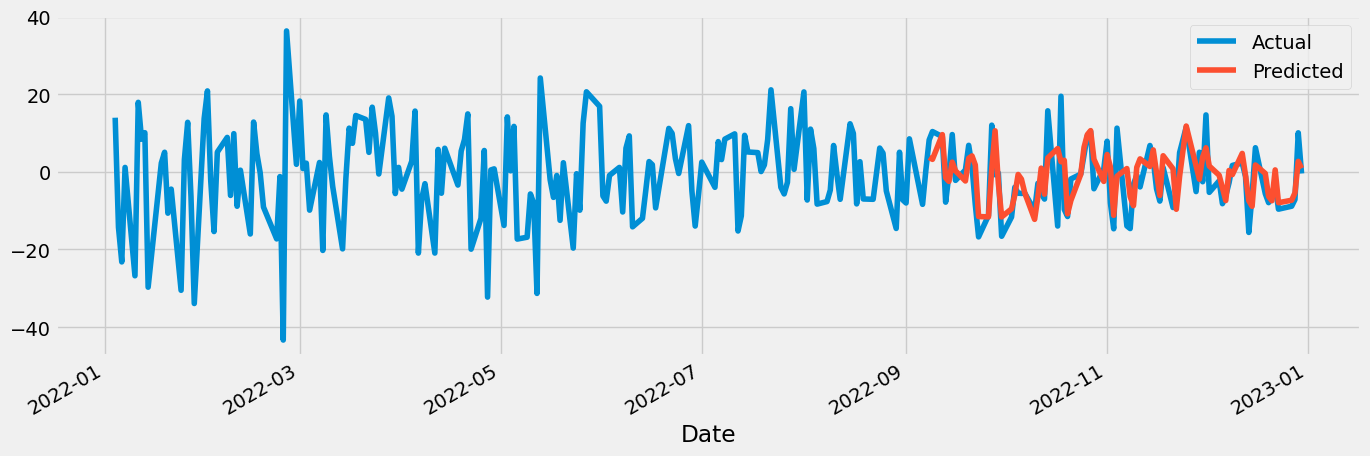

In [421]:
ax = df[['Open_change']].plot(figsize=(15, 5))
df[['Prediction']].plot(ax=ax)
ax.legend(["Actual", "Predicted"])
plt.show()

# TSS With Cross Validation (Testing only)

In [111]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5, test_size=30, gap=1)
df = df.sort_index()

In [112]:
def create_features(df):
    df = df.copy()
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    return df

features = ['year', 'month', 'day', 'dayofweek', 'Open', 'High', 'Low', 'Volume']
target = 'Close'

In [113]:
# fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df):
    train_df = create_features(df.iloc[train_idx])
    test_df = create_features(df.iloc[val_idx])

    X_train = train[features]
    y_train = train[target]

    X_test = test[features]
    y_test = test[target]

    reg = xgb.XGBRegressor(
        base_score=0.5,
        booster='gbtree',
        n_estimators=2000,
        objective='reg:tweedie', 
        learning_rate=0.01,
        early_stopping_rounds=100,
        max_depth=3,
        )
    reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)
    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)
    # train['Close'].plot(ax=axs[f old], label='Training Set', title=f'Data Train / Test Split Fold {fold}')
    # test['Close'].plot(ax=axs[fold], label='Test Set')
    # axs[fold].axvline(test.index.min(), color='black', ls='--')
    # fold += 1

[0]	validation_0-tweedie-nloglik@1.5:73.25605	validation_1-tweedie-nloglik@1.5:197.04252
[100]	validation_0-tweedie-nloglik@1.5:32.77532	validation_1-tweedie-nloglik@1.5:80.46598
[200]	validation_0-tweedie-nloglik@1.5:21.99253	validation_1-tweedie-nloglik@1.5:44.32280
[300]	validation_0-tweedie-nloglik@1.5:20.02668	validation_1-tweedie-nloglik@1.5:35.91794
[400]	validation_0-tweedie-nloglik@1.5:19.74082	validation_1-tweedie-nloglik@1.5:34.08120
[500]	validation_0-tweedie-nloglik@1.5:19.70149	validation_1-tweedie-nloglik@1.5:33.68142
[600]	validation_0-tweedie-nloglik@1.5:19.69609	validation_1-tweedie-nloglik@1.5:33.57441
[700]	validation_0-tweedie-nloglik@1.5:19.69532	validation_1-tweedie-nloglik@1.5:33.53750
[800]	validation_0-tweedie-nloglik@1.5:19.69519	validation_1-tweedie-nloglik@1.5:33.52274
[900]	validation_0-tweedie-nloglik@1.5:19.69515	validation_1-tweedie-nloglik@1.5:33.51783
[1000]	validation_0-tweedie-nloglik@1.5:19.69514	validation_1-tweedie-nloglik@1.5:33.51421
[1100]	val

In [114]:
scores

[15.077565318042568,
 17.1029217373159,
 14.501139992307396,
 3.136722442640417,
 48.488649446412175]

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_, index=reg.feature_names_in_, columns=['importance'])
fi.plot(kind='barh', figsize=(10, 10))

In [ ]:
test_df['Prediction'] = reg.predict(X_test)
df = df.merge(test_df[['Prediction']], how='left', left_index=True, right_index=True)

In [ ]:
ax = df[['Close']].plot(figsize=(15, 5))
df[['Prediction']].plot(ax=ax, style='.')
ax.legend(["Actual", "Predicted"])
plt.show()